<a href="https://colab.research.google.com/github/alisyap28/Website-Pendeteksi-Kebersihan-Lingkungan/blob/main/Pendeteksi_Kebersihan_Lingkungan3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns




In [2]:
# mengecek versi Tensorflow di Colab
import tensorflow as tf
print(tf.__version__)

2.7.0


In [3]:
!pip install opendatasets

In [ ]:
# install paket kaggle
!pip install -q kaggle

# Upload file kaggle.json dari Create New API Token Akun Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mfadliramadhan","key":"513eacf5e5cf2b93e27710bfa2728024"}'}

In [4]:

import opendatasets as od
dataset_url= 'https://www.kaggle.com/mfadliramadhan/cleandirtygarbage'
od.download('https://www.kaggle.com/mfadliramadhan/cleandirtygarbage')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mfadliramadhan
Your Kaggle Key: ··········


100%|██████████| 643M/643M [00:04<00:00, 158MB/s]


In [5]:
# melakukan ekstraksi pada file zip
import zipfile,os

 
base_dir = '/content/cleandirtygarbage/garbage'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.listdir('/content/cleandirtygarbage/garbage/train')
os.listdir('/content/cleandirtygarbage/garbage/test')

['dirty', 'clean']

In [6]:
# Total seluruh data
train_clean = len(os.listdir('/content/cleandirtygarbage/garbage/train/clean'))
train_dirty = len(os.listdir('/content/cleandirtygarbage/garbage/train/dirty'))
test_clean = len(os.listdir('/content/cleandirtygarbage/garbage/test/clean'))
test_dirty = len(os.listdir('/content/cleandirtygarbage/garbage/test/dirty'))

print("count data: ")
print("train clean: " + str(train_clean))
print("train dirty: " + str(train_dirty))
print("train clean: " + str(test_clean))
print("test dirty: " + str(test_dirty))
print("total: "+ str(train_clean+train_dirty+test_clean+test_dirty))

count data: 
train clean: 1207
train dirty: 1019
train clean: 600
test dirty: 600
total: 3426


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary',
        subset = 'training')

test_generator = test_datagen.flow_from_directory(
        test_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary',
        subset = 'validation')

Found 1782 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [8]:
print(train_generator.class_indices)

{'clean': 0, 'dirty': 1}


In [9]:
# membangun arsitektur sebuah CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97 and logs.get('val_accuracy')>0.97):
      print("\nPelatihan dihentikan, Akurasi Model sangat Baik yaitu diatas 97%!")
      self.model.stop_training = True
callbacks = myCallback()

In [18]:
# Optimizer dengan learning rate
from tensorflow.keras.optimizers import Adam
adam = Adam(lr=0.0001)
model.compile(loss = 'binary_crossentropy',
              optimizer = adam,
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
history = model.fit(
      train_generator,  
      epochs=50, 
      steps_per_epoch=25,
      validation_data=test_generator,
      validation_steps=5, 
      verbose=2,
      callbacks=[callbacks])

Epoch 1/50
25/25 - 14s - loss: 0.6953 - accuracy: 0.5500 - val_loss: 0.6774 - val_accuracy: 0.7500 - 14s/epoch - 548ms/step
Epoch 2/50
25/25 - 3s - loss: 0.6693 - accuracy: 0.6200 - val_loss: 0.6524 - val_accuracy: 0.6000 - 3s/epoch - 116ms/step
Epoch 3/50
25/25 - 3s - loss: 0.6828 - accuracy: 0.5300 - val_loss: 0.6696 - val_accuracy: 0.6500 - 3s/epoch - 125ms/step
Epoch 4/50
25/25 - 3s - loss: 0.6855 - accuracy: 0.6200 - val_loss: 0.6415 - val_accuracy: 0.6500 - 3s/epoch - 119ms/step
Epoch 5/50
25/25 - 3s - loss: 0.6736 - accuracy: 0.6100 - val_loss: 0.6555 - val_accuracy: 0.7000 - 3s/epoch - 126ms/step
Epoch 6/50
25/25 - 3s - loss: 0.6562 - accuracy: 0.6800 - val_loss: 0.6405 - val_accuracy: 0.7500 - 3s/epoch - 118ms/step
Epoch 7/50
25/25 - 3s - loss: 0.6776 - accuracy: 0.5500 - val_loss: 0.6190 - val_accuracy: 0.7500 - 3s/epoch - 119ms/step
Epoch 8/50
25/25 - 3s - loss: 0.6237 - accuracy: 0.6800 - val_loss: 0.7351 - val_accuracy: 0.4500 - 3s/epoch - 124ms/step
Epoch 9/50
25/25 - 3s 

Saving 022596600_1528197934-Tong-Sampah-Jerman6.jpg to 022596600_1528197934-Tong-Sampah-Jerman6.jpg
022596600_1528197934-Tong-Sampah-Jerman6.jpg
kotor


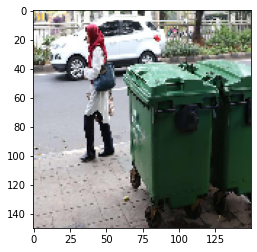

In [15]:
# melihat hasil dari model yang telah Anda buat pada Notebook. 
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('bersih')
  else:
    print('kotor')

Saving 7d90f40ae06256b93b305ea037e4b83161897639.temp.jpeg to 7d90f40ae06256b93b305ea037e4b83161897639.temp.jpeg
7d90f40ae06256b93b305ea037e4b83161897639.temp.jpeg
kotor


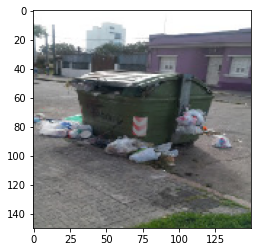

In [ ]:
# melihat hasil dari model yang telah Anda buat pada Notebook. 
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('bersih')
  else:
    print('kotor')

In [ ]:
# METRIK EVALUSASI
# MEMBUAT PLOT AKURASI TRAINING DAN VALIDATION
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
# Menyimpan Model ke Format TF-Lite
# Mengkonversi Model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Menyimpan Model
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)